# OpenCV를 이용한 이미지 회전
* 일반적인 방법
   - `cv2.getRotationMatrix2D()`
   - `cv2.warpAffine()`
* `imutils패키지` 사용
  - `imutils.rotate()`
  - `imutils.rotate_bound()`
* [더 많은 참조](https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/)

### 이미지 다운로드

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-rotate/opencv-rotate.zip
!unzip -qq opencv-rotate.zip
%cd opencv-rotate

--2021-04-21 08:05:24--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-rotate/opencv-rotate.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.251.17
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.251.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37160 (36K) [application/zip]
Saving to: ‘opencv-rotate.zip’

opencv-rotate.zip   100%[===================>]  36.29K  --.-KB/s    in 0.1s    

2021-04-21 08:05:25 (273 KB/s) - ‘opencv-rotate.zip’ saved [37160/37160]

/content/opencv-rotate


## 코드 수행

### 패키지 임포트

In [5]:
# import the necessary packages
import matplotlib.pyplot as plt
import argparse
import cv2
import imutils  # 이미지 회전, 이동, 크기 조절
import numpy as np

### 코랩 및 쥬피터에서 이미지 표출

In [2]:
def plt_imshow(title, image):
  '''
  이미지를 BGR에서 RGB로 변환하고 이미지 화면에 표출
  '''
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(title)
  plt.grid(False);plt.show()

### OpenCV를 이용한 이미지 회전

In [8]:
# 파이썬 스크립트를 CLI환경에서 실행시에 필요
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, default="opencv_logo.png",
# 	help="path to the input image")
# args = vars(ap.parse_args())

# 쥬피터 및 코랩에서 사용하므로 위의 주석 처리 
args = {
    "image": "opencv_logo.png"
}

### OpenCV에서 이미지 회전시 angle의 값
* 양수(Positive)값은 시계 반대방향(counterclockwise)
* 음수(Negative)값은 시계방향(clockwise)를 의미
* cv2.getRotationMatrix2D(기준위치, 회전각도, 이미지 스케일)

In [6]:
help(cv2.getRotationMatrix2D)

Help on built-in function getRotationMatrix2D:

getRotationMatrix2D(...)
    getRotationMatrix2D(center, angle, scale) -> retval
    .   @brief Calculates an affine matrix of 2D rotation.
    .   
    .   The function calculates the following matrix:
    .   
    .   \f[\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot \texttt{center.x} -  \beta \cdot \texttt{center.y} \\ - \beta &  \alpha &  \beta \cdot \texttt{center.x} + (1- \alpha )  \cdot \texttt{center.y} \end{bmatrix}\f]
    .   
    .   where
    .   
    .   \f[\begin{array}{l} \alpha =  \texttt{scale} \cdot \cos \texttt{angle} , \\ \beta =  \texttt{scale} \cdot \sin \texttt{angle} \end{array}\f]
    .   
    .   The transformation maps the rotation center to itself. If this is not the target, adjust the shift.
    .   
    .   @param center Center of the rotation in the source image.
    .   @param angle Rotation angle in degrees. Positive values mean counter-clockwise rotation (the
    .   coordinate origin is assumed to

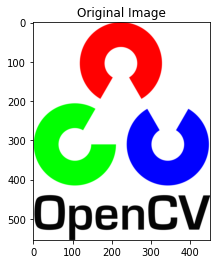

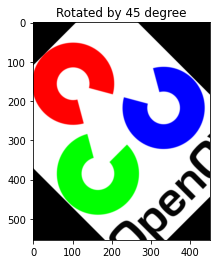

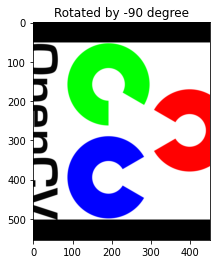

In [10]:
# 메모리에서 이미지로드 및 화면 표출
image = cv2.imread(args['image'])
plt_imshow("Original Image", image)

# 이미지의 높이와 너비 
# 중앙 위치 계산
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

# 이미지의 중앙 좌표를 기준으로 45도 회전(45 degrees)
# angle값이 양수이면 시계반대방향을 의미(counterclockwise)
M= cv2.getRotationMatrix2D((cX, cY), 45, 1.0)  # 중앙 좌표, X좌표, Y좌표, 각도, 스케일(눈금)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by 45 degree", rotated)

# 이미지의 중앙 좌표를 기준으로 90회전 (90 degrees)
# 시계방향으로 90만큼 
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by -90 degree", rotated)

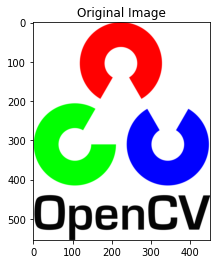

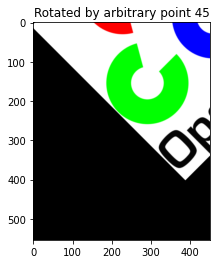

In [14]:
# 왼쪽상단(top-left)의 한 포인트(10, 10)을 기준으로 시계반대 방향으로 45도 회전
plt_imshow("Original Image", image)

M = cv2.getRotationMatrix2D((10, 10), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by arbitrary point 45", rotated)

In [ ]:
help(imutils.rotate)  # image, angle, center=None, scale=1.0

Help on function rotate in module imutils.convenience:

rotate(image, angle, center=None, scale=1.0)



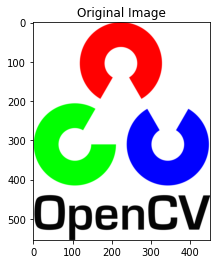

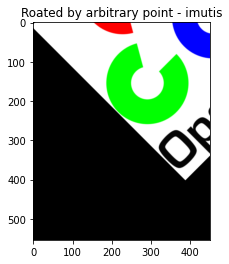

In [15]:
# 시계 반대 방향으로 (10, 10) 위치를 기준으로 45도 회전
plt_imshow("Original Image", image)
rotated = imutils.rotate(image, 45, center=(10, 10),scale=1.0)
plt_imshow("Roated by arbitrary point - imutis", rotated)

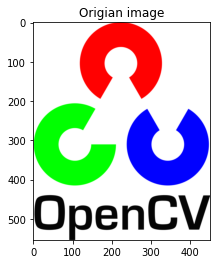

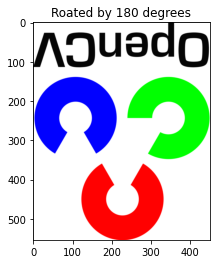

In [ ]:
# 시계 반대 방향으로 180도 회전
# imutils이용
# 1번의 방법을 한 줄로 처리 
rotated = imutils.rotate(image, 180)
plt_imshow("Origian image", image)
plt_imshow("Roated by 180 degrees", rotated)

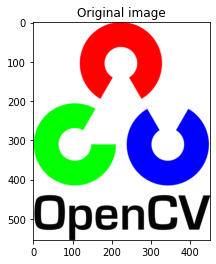

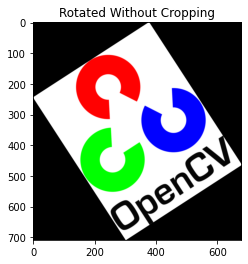

In [ ]:
# 33도로 시계방향으로 회전시키는데 이미지가 짤리지 않고 나옴
rotated = imutils.rotate_bound(image, -33)
plt_imshow("Original image", image)
plt_imshow("Rotated Without Cropping", rotated)  # 이미지 회전시 이미지가 잘리지 않고 전체 이미지가 보임

## 영원한 직녀_전지현

In [18]:
args = {
    "image": "IMG_4918.jpg"
}

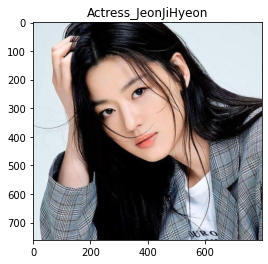

In [19]:
jeon = cv2.imread(args["image"])
plt_imshow("Actress_JeonJiHyeon", jeon)

In [21]:
def show_rotated_img(angle, cPos, noCrop=True):
  '''
  각도와 좌표를 받아서 회전된 이미지를 보여줌.
  '''
  rotated = None
  if noCrop:
    rotated = imutils.rotate_bound(jeon, angle)  # 회전되더라도 이미지가 짤리지 않고 다보임.
  else:
    rotated = imutils.rotate(jeon, angle, cPos, scale=1.0)

  plt_imshow("Roated Jeon", rotated)

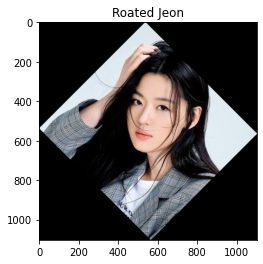

In [22]:
#수행
show_rotated_img(45, (cX, cY)) # 